In [ ]:
# your code goes here

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


# load breast cancer dataset

ds = load_breast_cancer()

X, y, feature_names = ds.data, ds.target, ds.feature_names

target_names = ds.target_names

# you can decide the ratios by your own, here it just shows an example:
# Ratios of training, validation, and test are 75%, 15%, and 10%.
test_ratio = 0.1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)
print(x_train.shape, x_test.shape)

(512, 30) (57, 30)


In [ ]:
# Grader's area

maxScore = maxScore + 3
# M[1,1]=

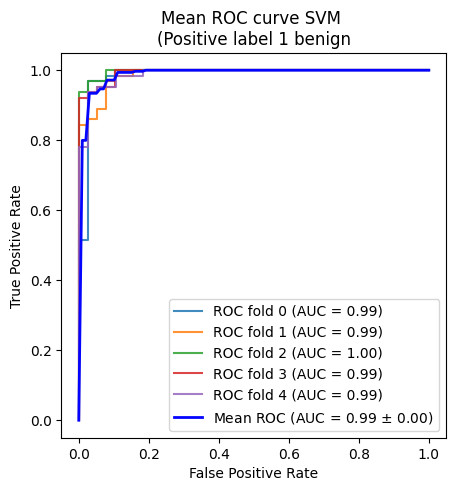

Five-fold cross validation scores (SVM): [0.94695643 0.9475827  0.96837209 0.93830645 0.93772894]
Evaluation of test performance with SVM: 
test accuracy 0.9649122807017544, 
precision 1.0, 
recall 0.9487179487179487, 
specificity 1.0


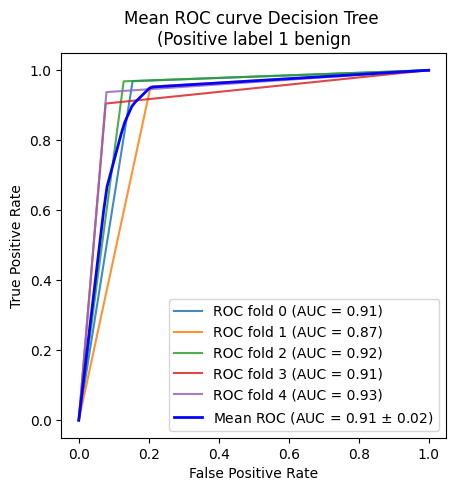

Five-fold cross validation scores (Decision Tree): [0.91564292 0.88330415 0.92620155 0.90785908 0.9269864 ]
Evaluation of test performance with Decision Tree: 
test accuracy 0.9122807017543859, 
precision 0.9473684210526315, 
recall 0.9230769230769231, 
specificity 0.8888888888888888
Best Model: SVM with CV score: 0.9477893223484892


In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


def plot_fold_wise_ROC(clf, cv, classifier_name, X, y, target_names):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)


  fig, ax = plt.subplots(figsize=(5, 5))
  for fold, (train, val) in enumerate(cv.split(X, y)):
      clf.fit(X[train], y[train])
      viz = RocCurveDisplay.from_estimator(
          clf,
          X[val],
          y[val],
          name=f"ROC fold {fold}",
          alpha=0.85,
          lw=1.5,
          ax=ax,
      )
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="b",
      label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
      lw=2,
      alpha=0.98,
  )

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

  ax.set(
      xlim=[-0.05, 1.05],
      ylim=[-0.05, 1.05],
      xlabel="False Positive Rate",
      ylabel="True Positive Rate",
      title="Mean ROC curve %s \n(Positive label 1 %s" %(classifier_name, target_names[1]))
  ax.axis("square")
  ax.legend(loc="lower right")
  plt.show()

# We applied 90% of entire dataset for training and validation,
# the remaning 10% data is used to test the models.

# define classifiers
classifier = {'SVM': svm.SVC(kernel="linear", probability=True, random_state= 0),
              'Decision Tree': DecisionTreeClassifier(random_state=0)}
best_score = 0
cv = StratifiedKFold(n_splits = 5)

test_results = []
for classifier_name, clf in classifier.items():
  # 5-fold cross validation
  scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='f1_macro')
  mean_score = scores.mean()

  # model selection based on the best CV score
  if mean_score > best_score:
      best_score = mean_score
      best_model_name = classifier_name

  # plot the foldwise ROC-AUC curves for each classifier
  plot_fold_wise_ROC(clf, cv, classifier_name, x_train, y_train, target_names)

  # make prediction on test set x_test
  y_pred = clf.predict(x_test)

  # evaluate test performance
  def compute_metrics(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    test_accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return test_accuracy, precision, recall, specificity

  test_accuracy, precision, recall, specificity = compute_metrics(y_test, y_pred)

  test_results.append([test_accuracy, precision, recall, specificity])

  print('Five-fold cross validation scores (%s):'%(classifier_name), scores)

  print(f'Evaluation of test performance with {classifier_name}: \ntest accuracy {test_accuracy}, \nprecision {precision}, \nrecall {recall}, \nspecificity {specificity}')


print(f"Best Model: {best_model_name} with CV score: {best_score}")


,SVM,Decision Tree
test_accuracy,0.964912,0.912281
precision,1.000000,0.947368
recall,0.948718,0.923077
specificity,1.000000,0.888889


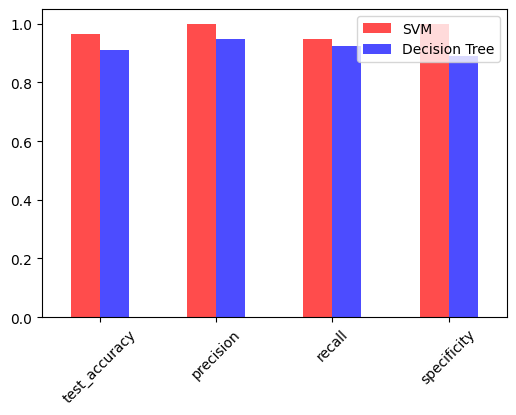

In [ ]:
# To further visualize the evaluation results for both SVM and Decision Tree
import pandas as pd
df = pd.DataFrame(test_results, columns = ['test_accuracy','precision', 'recall', 'specificity']).T
df.columns = ['SVM', 'Decision Tree']
ax = df.plot.bar(rot = 45, figsize = [6, 4], alpha = .7, color=['r','b'])
ax.legend(['SVM', 'Decision Tree'])
df

# <font color= 'blue'>**Summary**</font>

- 10% of entire dataset is used for testing, while the remaining data is further splitted into five folds for 5-fold cross validation, and model selection.

- According to final 5-fold cross-validation results, **the SVM classifier stands out with an impressive f1_macro score of 94.8% compared to using the Decision Tree**.  
- During testing, **the SVM model outperformed Decision Tree in terms of test accuracy, precision, recall and specificity**, see more dtailed comparison from the above bar plot.








